In [75]:
import pandas as pd
import numpy as np
import altair as alt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image


# Data Science Concepts and Analysis

### Week 1: Tidy and Transform

* Why tidy?
* Principles of tidy data
* Transforming tidy data

## This week

* **Why tidy?**
    + Many ways to structure a dataset
    + Few organizational constraints 'in the wild'

* **Principles of tidy data: matching semantics with structure**
    + Data semantics: observations and variables
    + Tabular structure: rows and columns
    + The tidy standard
    + Common messes
    + Tidying operations

* **Transforming tidy data**
    + Subsetting (slicing and filtering)
    + Derived variables
    + Aggregation and summary statistics

# Why tidy?

* Many possible layouts for tabular data
* 'Real' datasets have few organizational constraints

Most data are stored in tables, but **there are always multiple possible tabular layouts for the same underlying data**.

## Many layouts

Let's look at some examples.

### Mammal data: long layouts

Below is the Allison 1976 mammal brain-body weight dataset from week 0 lecture shown in two 'long' layouts: 

In [2]:
# import brain and body weights
mammal1 = pd.read_csv('data/allison1976.csv').iloc[:, 0:3].set_index('species')

mammal2 = mammal1.melt(
    var_name = 'measurement', 
    value_name = 'weight', 
    value_vars = ['brain_wt', 'body_wt'],
    ignore_index = False
).sort_index()

mammal3 = mammal2.reset_index().pivot(index = 'measurement', columns = 'species', values = 'weight')

In [3]:
mammal1.head(4)

,body_wt,brain_wt
species,,
Africanelephant,6654.000,5712.0
Africangiantpouchedrat,1.000,6.6
ArcticFox,3.385,44.5
Arcticgroundsquirrel,0.920,5.7


In [4]:
mammal2.head(4)

,measurement,weight
species,,
Africanelephant,brain_wt,5712.0
Africanelephant,body_wt,6654.0
Africangiantpouchedrat,brain_wt,6.6
Africangiantpouchedrat,body_wt,1.0


## Many layouts

### Mammal data: wide layout

Here's a third possible layout for the mammal brain-body weight data:

In [5]:
mammal3.iloc[:, 0:4].head()

species,Africanelephant,Africangiantpouchedrat,ArcticFox,Arcticgroundsquirrel
measurement,,,,
body_wt,6654.0,1.0,3.385,0.92
brain_wt,5712.0,6.6,44.500,5.70


## Many layouts

### GDP growth data: wide layout 

Here's another example: World Bank data on annual GDP growth for 264 countries from 1961 -- 2019. The raw layout is shown below.

In [6]:
gdp1 = pd.read_csv('data/annual_growth.csv', encoding = 'latin1')
gdp1.head()

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.706892,2.545322,1.417526,1.001987,1.774487,2.218752,3.314805,3.802197,4.071301,2.240070
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.974958,-0.008070,-4.974444,-3.547597,2.504466,1.434140,3.709678,0.346072,1.588765,1.849238


## Many layouts

### GDP growth data: long layout

Here's an alternative layout for the annual GDP growth data:

In [7]:
gdp2 = gdp1.set_index(
    'Country Name'
).drop(
    columns = 'Country Code'
).melt(
    var_name = 'year',
    value_name = 'growth_pct',
    ignore_index = False
).reset_index(
).sort_values(
    ['year', 'Country Name']
).set_index('Country Name')

In [8]:
gdp2

,year,growth_pct
Country Name,,
Afghanistan,1961,NaN
Albania,1961,NaN
Algeria,1961,-13.605441
American Samoa,1961,NaN
Andorra,1961,NaN
...,...,...
West Bank and Gaza,2019,0.949014
World,2019,2.343378
"Yemen, Rep.",2019,2.097414


## Many layouts

### SB weather data: long layouts

A third example: daily minimum and maximum temperatures recorded at Santa Barbara Municipal Airport from January 2021 through March 2021.

In [9]:
weather1 = pd.read_csv('data/sb_weather.csv')
weather2 = weather1.copy()
weather2['MONTH'] = pd.to_datetime(weather1.DATE, infer_datetime_format = True).dt.month
weather2['DAY'] = pd.to_datetime(weather1.DATE, infer_datetime_format = True).dt.day
weather2['YEAR'] = pd.to_datetime(weather1.DATE, infer_datetime_format = True).dt.year
weather2 = weather2.drop(columns = ['NAME', 'DATE'])
weather3 = weather2.set_index(
    ['MONTH', 'DAY']
).melt(
    value_name = 'temp',
    var_name = 'type',
    value_vars = ['TMAX', 'TMIN'],
    ignore_index = False
).reset_index().pivot(index = ['MONTH', 'type'], columns = 'DAY', values = 'temp')

In [10]:
weather1.head()

,STATION,NAME,DATE,TMAX,TMIN
0,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/1/2021,65,37
1,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/2/2021,62,38
2,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/3/2021,60,42
3,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/4/2021,72,43
4,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/5/2021,61,40


In [11]:
weather2.head()

,STATION,TMAX,TMIN,MONTH,DAY,YEAR
0,USW00023190,65,37,1,1,2021
1,USW00023190,62,38,1,2,2021
2,USW00023190,60,42,1,3,2021
3,USW00023190,72,43,1,4,2021
4,USW00023190,61,40,1,5,2021


## Many layouts

### SB weather data: wide layout

Here's a wide layout for the SB weather data:

In [44]:
weather3.head()

DAY           1     2     3     4     5     6     7     8     9     10  ...  \
MONTH type                                                              ...   
1     TMAX  65.0  62.0  60.0  72.0  61.0  71.0  73.0  79.0  71.0  67.0  ...   
      TMIN  37.0  38.0  42.0  43.0  40.0  39.0  38.0  36.0  39.0  37.0  ...   
2     TMAX  66.0  67.0  69.0  63.0  66.0  68.0  60.0  57.0  59.0  61.0  ...   
      TMIN  45.0  40.0  44.0  37.0  38.0  38.0  38.0  49.0  49.0  41.0  ...   
3     TMAX  68.0  66.0  59.0  62.0  67.0  69.0  60.0  69.0  65.0  58.0  ...   

DAY           22    23    24    25    26    27    28    29    30    31  
MONTH type                                                              
1     TMAX  61.0  59.0  65.0  55.0  57.0  54.0  55.0  55.0  58.0  63.0  
      TMIN  41.0  40.0  38.0  44.0  40.0  48.0  49.0  42.0  37.0  37.0  
2     TMAX  75.0  75.0  70.0  66.0  69.0  76.0  68.0   NaN   NaN   NaN  
      TMIN  37.0  39.0  41.0  39.0  36.0  43.0  38.0   NaN   NaN   NaN  
3     TMAX  71.0  72.0  67.0  65.0  63.0  72.0  73.0  77.0   NaN   NaN  

[5 rows x 31 columns]

## Many layouts

### UN development data: multiple tables

A final example: United Nations country development data organized into different tables according to variable type.

In [13]:
undev1 = pd.read_csv(
    'data/hdi3.csv', 
    encoding = 'latin1',
    na_values = '..'
).drop(
    columns = 'hdi_rank'
).set_index(
    'country'
).sort_index()

undev2 = pd.read_csv(
    'data/hdi2.csv', 
    encoding = 'latin1',
    na_values = '..'
).drop(
    columns = ['hdi_rank', 'maternal_mortality']
).set_index('country')

Here is a table of population measurements:

In [14]:
undev1.head(3)

,total_pop,urban_pct_pop,pop_under5,pop_15to64,pop_over65
country,,,,,
Afghanistan,38.0,25.8,5.6,20.9,1.0
Albania,2.9,61.2,0.2,2.0,0.4
Algeria,43.1,73.2,5.0,27.1,2.8


And here is a table of a few gender-related variables:

In [15]:
undev2.head(3)

,gender_inequality,parliament_pct_women,labor_participation_women,labor_participation_men
country,,,,
Norway,0.045,40.8,60.4,67.2
Ireland,0.093,24.3,56.0,68.4
Switzerland,0.025,38.6,62.9,73.8


## Many layouts

### UN development data: one table

Here are both tables merged by country:

In [16]:
undev_combined1 = pd.merge(undev1, undev2, on = 'country')

In [17]:
undev_combined1.head(3)

,total_pop,urban_pct_pop,pop_under5,pop_15to64,pop_over65,gender_inequality,parliament_pct_women,labor_participation_women,labor_participation_men
country,,,,,,,,,
Afghanistan,38.0,25.8,5.6,20.9,1.0,0.655,27.2,21.6,74.7
Albania,2.9,61.2,0.2,2.0,0.4,0.181,29.5,46.7,64.6
Algeria,43.1,73.2,5.0,27.1,2.8,0.429,21.5,14.6,67.4


## Many layouts

### UN development data: one (longer) table

And here is another arrangement of the merged table:

In [18]:
undev_combined2 = undev_combined1.melt(
    id_vars = undev1.columns[undev1.columns.str.contains('pop')].tolist(),
    var_name = 'gender_variable',
    value_name = 'gender_value',
    ignore_index = False
).melt(
    id_vars = ['gender_variable', 'gender_value'],
    var_name = 'population_variable',
    value_name = 'population_value',
    ignore_index = False
)

In [19]:
undev_combined2.head(5)

,gender_variable,gender_value,population_variable,population_value
country,,,,
Afghanistan,gender_inequality,0.655,total_pop,38.0
Albania,gender_inequality,0.181,total_pop,2.9
Algeria,gender_inequality,0.429,total_pop,43.1
Andorra,gender_inequality,NaN,total_pop,0.1
Angola,gender_inequality,0.536,total_pop,31.8


## Many layouts

**Pause and reflect**

Return to one of the examples and review the different layouts.

* If you had to pick one layout, which would you choose?
* Why would you choose that one?
    + Aesthetic preference?
    + "Just makes sense this way"?
    + "This way is better because..."? 
* Can you envision advantages or disadvantages to different layouts?

## Few organizational constraints

It's surprisingly difficult to articulate reasons why one layout might be preferable to another.

Possibly for this reason, most data are stored in a layout that made intuitive sense to someone responsible for data management or collection at some point in time.

* Usually the choice of layout isn't principled
* Idiosyncratic: two people are likely to make different choices

As a result:

* Few widely used conventions
* Lots of variability 'in the wild'
* Datasets are often organized in bizarre ways

## Consequences for the data scientist

Because of the wide range of possible layouts for a dataset, and the variety of choices that are made about how to store data, **data scientists are constantly faced with determining how best to reorganize datasets in a way that facilitates exploration and analysis.** 

Broadly, this involves two interdependent choices:

* *Choice of **representation**: how to encode information.*
    + Example: parse dates as 'MM/DD/YYYY' (one variable) or 'MM', 'DD', 'YYYY' (three variables)?
    + Example: use values 1, 2, 3 or 'low', 'med', 'high'?
    + Example: name variables 'question1', 'question2', ..., or 'age', 'income', ...?
    

* *Choice of **form**: how to display information*
    + Example: wide table or long table?
    + Example: one table or many?

## Remedy: the tidy data standard

Instead of addressing these challenges -- choice of form and representation -- anew every single time, it is immensely helpful to have a set of organizational principles to standardize the process of rearranging data.

The **tidy data standard** is a principled way of organizing data values. It has two main advantages:

1. Facilitates workflow by establishing a consistent dataset structure.
2. Principles are designed to make transformation, exploration, visualization, and modeling easy.

This is a pretty intuitive idea. Many (most?) other things are easier when they're thoughtfully organized:

* Kitchens
* Closets
* Taxes

# Principles of tidy data

* **Tidy data matches semantics with structure**
    + Data semantics: observations, variables, units
    + Tabular structure: rows and columns
    + The tidy data standard
    + Common messes
    + Tidying operations

## Matching semantics with structure

> "Tidying your data means storing it in a consistent form that matches the semantics of the dataset with the way it is stored. In brief, when your data is tidy, each column is a variable, and each row is an observation. Tidy data is important because the consistent structure lets you focus your struggle on questions about the data, not fighting to get the data into the right form for different functions." *Wickham and Grolemund, R for Data Science, 2017.*

A dataset is a collection of values.

* semantics: meaning
    + *data semantics* refers to the meaning of each value

* structure: form 
    + *data structure* refers to how values are arranged

The **tidy standard**: data semantics $\longleftrightarrow$ data structure

## Data semantics: units, variables, and observations

*Data semantics* refers to the meaning of values. To introduce some general vocabulary, each value is

* an **observation**
* of a **variable** 
* taken on a **unit**.

To be precise:

* An **observational unit** is the entity measured.
* A **variable** is an attribute measured on each unit.
* An **observation** is a collection of measurements taken on one unit.

## Identifying units, variables, and observations

Let's do an example. In the GDP growth data:

Term | Definition| Example
---|---|---
Observational units | Entity measured | Countries
Variables | Attributes measured | Year, GDP growth
Observations | Set of measurements per unit | Annual records

In [45]:
# third record
gdp2.iloc[[2], :]

,year,growth_pct
Country Name,,
Algeria,1961,-13.605441


So, below, -13.605441 (variable) in 1961 (variable) is a record (observation) for Algeria (unit).

## Identifying units, variables, and observations

In the weather data:

Term | Definition | Instance
---|---|---
Observational unit | Entity measured | SB airport weather station (location)
Variables | Attributes measured | Min temp, max temp, date, station info
Observations | Set of measurements per unit | Daily records

In [46]:
# first record
weather1.iloc[[0], :]

,STATION,NAME,DATE,TMAX,TMIN
0,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/1/2021,65,37


For example: 65 degrees Farenheit is the maximum temperature (one variable) recorded on a day (one observation) at the SB airport weather station (unit).

## Data structure

*Data structure* refers to the form in which it is stored. 

In this context, that means a tabular arranement of a dataset comprising:

* rows
* columns

As we saw, there are multiple structures available to represent any dataset.

## The tidy standard

The tidy standard consists in matching semantics and structure. 

We can now make that precise. A dataset conforming to the **tidy standard** is organized so that:

1. Each variable is a column.
2. Each observation is a row.
3. Each table contains measurements on only one type of observational unit.

<img src="figures/tidy-layout.png" style="height:200px">

## Tidy or messy?

Let's revisit some of our examples of multiple layouts, starting with `gdp1`.

In [47]:
gdp1.head(3)

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644


We can compare the semantics and structure for alignment:

Semantics | - || Structure | -
---|---||---|---
Observations | Annual records || Rows | Countries
Variables | GDP growth and year || Columns | Value of year
Observational units | Countries || Tables | Just one

Rules 1 and 2 are violated, since column names are values, not variables. *Not tidy*.

## Tidy or messy?

In `gdp2`:

In [48]:
gdp2.head(4)

,year,growth_pct
Country Name,,
Afghanistan,1961,NaN
Albania,1961,NaN
Algeria,1961,-13.605441
American Samoa,1961,NaN


We can compare the semantics and structure for alignment:

Semantics | - || Structure | -
---|---||---|---
Observations | Annual records || Rows | Annual records
Variables | GDP growth and year || Columns | GDP growth and year
Observational units | Countries || Tables | Just one

All three rules are met: rows are observations, columns are variables, and there's one unit type and one table. *Tidy*.

## Tidy or messy?

In `weather1`:

In [49]:
weather1.head(3)

,STATION,NAME,DATE,TMAX,TMIN
0,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/1/2021,65,37
1,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/2/2021,62,38
2,USW00023190,"SANTA BARBARA MUNICIPAL AIRPORT, CA US",1/3/2021,60,42


We can compare the semantics and structure for alignment:

Semantics | - || Structure | -
---|---||---|---
Observations | Daily records || Rows | Daily records
Variables | Min temp, max temp, date || Columns | Min temp, max temp, date, and station info
Observational units | Weather stations || Tables | Just one

All three rules are met: rows are observations, columns are variables, and there's one unit type and one table. *Tidy*.

## Tidy or messy?

In `weather3`:

In [50]:
weather3

DAY           1     2     3     4     5     6     7     8     9     10  ...  \
MONTH type                                                              ...   
1     TMAX  65.0  62.0  60.0  72.0  61.0  71.0  73.0  79.0  71.0  67.0  ...   
      TMIN  37.0  38.0  42.0  43.0  40.0  39.0  38.0  36.0  39.0  37.0  ...   
2     TMAX  66.0  67.0  69.0  63.0  66.0  68.0  60.0  57.0  59.0  61.0  ...   
      TMIN  45.0  40.0  44.0  37.0  38.0  38.0  38.0  49.0  49.0  41.0  ...   
3     TMAX  68.0  66.0  59.0  62.0  67.0  69.0  60.0  69.0  65.0  58.0  ...   
      TMIN  37.0  36.0  36.0  37.0  39.0  43.0  47.0  47.0  47.0  43.0  ...   

DAY           22    23    24    25    26    27    28    29    30    31  
MONTH type                                                              
1     TMAX  61.0  59.0  65.0  55.0  57.0  54.0  55.0  55.0  58.0  63.0  
      TMIN  41.0  40.0  38.0  44.0  40.0  48.0  49.0  42.0  37.0  37.0  
2     TMAX  75.0  75.0  70.0  66.0  69.0  76.0  68.0   NaN   NaN   NaN  
      TMIN  37.0  39.0  41.0  39.0  36.0  43.0  38.0   NaN   NaN   NaN  
3     TMAX  71.0  72.0  67.0  65.0  63.0  72.0  73.0  77.0   NaN   NaN  
      TMIN  50.0  49.0  41.0  44.0  40.0  41.0  41.0  42.0   NaN   NaN  

[6 rows x 31 columns]

We can compare the semantics and structure for alignment:

Semantics | - || Structure | -
---|---||---|---
Observations | Daily records || Rows | Month and measurement type
Variables | Min temp, max temp, date || Columns | Day of month
Observational units | Weather stations || Tables | Just one

This violates both rules 1 and 2, since values are stored as both rows and columns. *Not tidy*.

## Tidy or messy?

In `undev1` and `undev2`:

In [51]:
undev1.head(2)

,total_pop,urban_pct_pop,pop_under5,pop_15to64,pop_over65
country,,,,,
Afghanistan,38.0,25.8,5.6,20.9,1.0
Albania,2.9,61.2,0.2,2.0,0.4


In [27]:
undev2.head(2)

,gender_inequality,parliament_pct_women,labor_participation_women,labor_participation_men
country,,,,
Norway,0.045,40.8,60.4,67.2
Ireland,0.093,24.3,56.0,68.4


We can compare the semantics and structure for alignment:

Semantics | - || Structure | -
---|---||---|---
Observations | Country records || Rows | Country records
Variables | Gender-related and population measurements || Columns | Gender-related and population measurements
Observational units | Countries || Tables | One per variable type

This violates rule 3 -- there is only one observational unit, but multiple tables. *Not tidy*.

## Common messes

> "Well, here's another nice mess you've gotten me into" -- Oliver Hardy

These examples illustrate some of the most common kinds of messiness:

* *Columns are values, not variables*
    + GDP data `gdp1`: columns are 1961, 1962, ...   

* *Multiple variables are stored in one column*
    + Mammal data `mammal2`: weight column contains both body and brain weights    

* *Variables or values are stored in rows and columns*
    + Weather data `weather3`: date values are stored in rows and columns, each column contains both min and max temperatures    

* *Measurements on one type of observational unit are divided into multiple tables.*
    + UN development data: `undev1` stores population variables; `undev2` stores gender-related variables.

## Tidying operations

These common messes can be cleaned up by some simple operations:

* *melt*
    + reshape a dataframe from wide to long format
* *pivot*
    + reshape a dataframe from long to wide format
* *merge*
    + combine two dataframes row-wise by matching the values of certain columns

## Melt

Melting resolves the problem of having values stored as columns (common mess 1). 

<img src="figures/tidy-melt.png" style="height:200px">

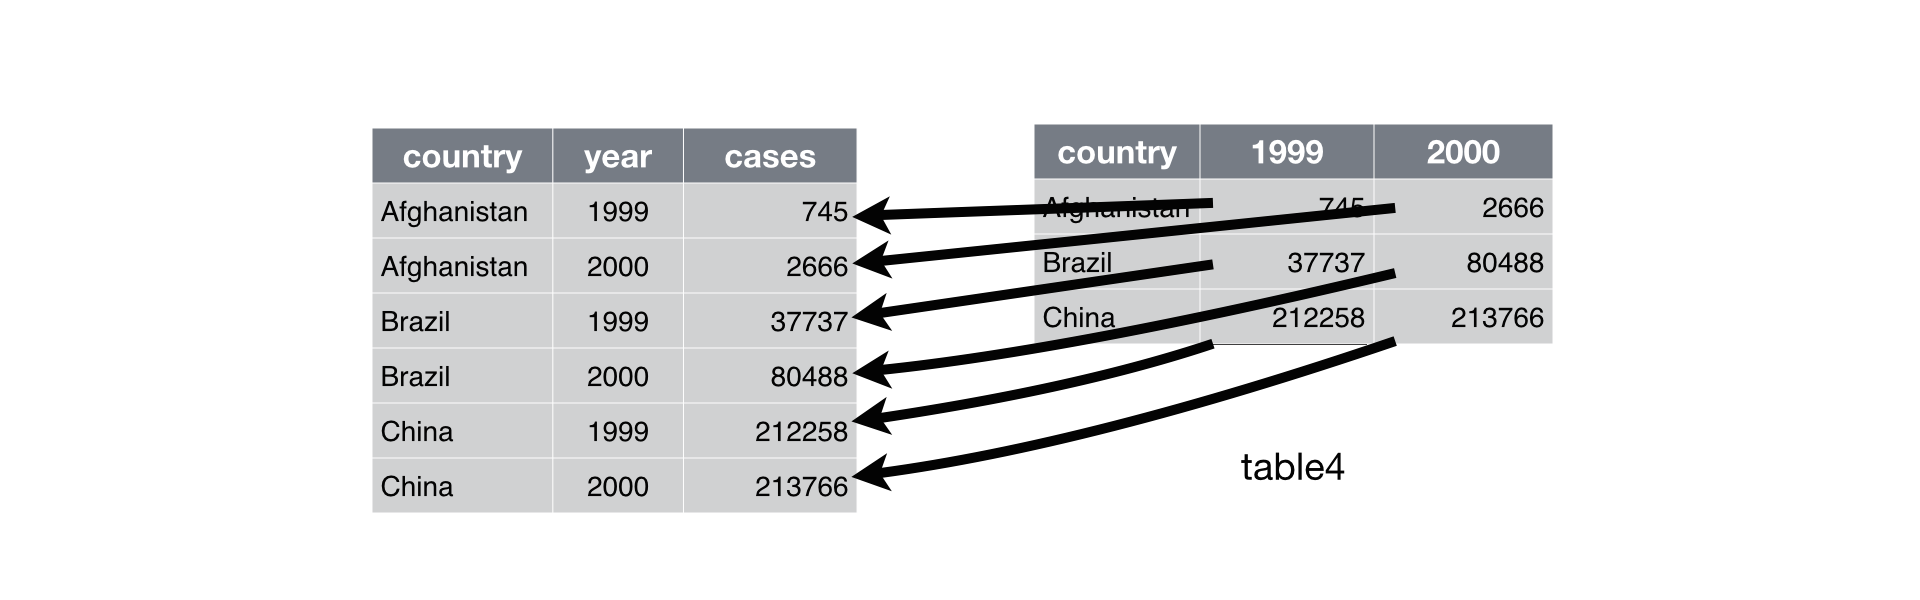

In [76]:
Image(filename='figures/tidy-melt.png') 

## Melt

To illustrate with `gdp1`:

In [52]:
gdp1.head(3)

,Country Name,Country Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.685029,3.446055,-1.369863,4.198232,0.300000,5.700001,2.100000,1.999999,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.647003,1.189228,3.911603
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.403933,3.471976,8.542188,4.954545,4.822628,0.943572,-2.580050,-0.147213,-2.003630,-0.624644


In [53]:
gdp1.melt(
    id_vars = ['Country Name', 'Country Code'], # which variables do you want to retain for each row? .
    var_name = 'Year', # what do you want to name the variable that will contain the column names?
    value_name = 'GDP Growth', # what do you want to name the variable that will contain the values?
).head()

,Country Name,Country Code,Year,GDP Growth
0,Aruba,ABW,1961,NaN
1,Afghanistan,AFG,1961,NaN
2,Angola,AGO,1961,NaN
3,Albania,ALB,1961,NaN
4,Andorra,AND,1961,NaN


## Pivot

Pivoting resolves the issue of having multiple variables stored in one column (common mess 2). 

<img src="figures/tidy-pivot.png" style="height:300px">

## Pivot

For example, the `mammal2` layout can be put in tidier form with a pivot:

In [55]:
mammal2.head(3)

,measurement,weight
species,,
Africanelephant,brain_wt,5712.0
Africanelephant,body_wt,6654.0
Africangiantpouchedrat,brain_wt,6.6


In [56]:
mammal2.pivot(
    columns = 'measurement', # which variable(s) do you want to send to new column names?
    values = 'weight' # which variable(s) do you want to use to populate the new columns?
).head(3)

measurement,body_wt,brain_wt
species,,
Africanelephant,6654.000,5712.0
Africangiantpouchedrat,1.000,6.6
ArcticFox,3.385,44.5


## Pivot and melt

Common mess 3 is a combination of messes 1 and 2: values or variables are stored in both rows and columns. Pivoting and melting in sequence can usually fix this. `weather3` illustrates this issue:

In [57]:
weather3

DAY           1     2     3     4     5     6     7     8     9     10  ...  \
MONTH type                                                              ...   
1     TMAX  65.0  62.0  60.0  72.0  61.0  71.0  73.0  79.0  71.0  67.0  ...   
      TMIN  37.0  38.0  42.0  43.0  40.0  39.0  38.0  36.0  39.0  37.0  ...   
2     TMAX  66.0  67.0  69.0  63.0  66.0  68.0  60.0  57.0  59.0  61.0  ...   
      TMIN  45.0  40.0  44.0  37.0  38.0  38.0  38.0  49.0  49.0  41.0  ...   
3     TMAX  68.0  66.0  59.0  62.0  67.0  69.0  60.0  69.0  65.0  58.0  ...   
      TMIN  37.0  36.0  36.0  37.0  39.0  43.0  47.0  47.0  47.0  43.0  ...   

DAY           22    23    24    25    26    27    28    29    30    31  
MONTH type                                                              
1     TMAX  61.0  59.0  65.0  55.0  57.0  54.0  55.0  55.0  58.0  63.0  
      TMIN  41.0  40.0  38.0  44.0  40.0  48.0  49.0  42.0  37.0  37.0  
2     TMAX  75.0  75.0  70.0  66.0  69.0  76.0  68.0   NaN   NaN   NaN  
      TMIN  37.0  39.0  41.0  39.0  36.0  43.0  38.0   NaN   NaN   NaN  
3     TMAX  71.0  72.0  67.0  65.0  63.0  72.0  73.0  77.0   NaN   NaN  
      TMIN  50.0  49.0  41.0  44.0  40.0  41.0  41.0  42.0   NaN   NaN  

[6 rows x 31 columns]

## Pivot and melt

Common mess 3 is a combination of messes 1 and 2: values or variables are stored in both rows and columns. Pivoting and melting in sequence can usually fix this. `weather3` illustrates this issue:

**First melt**

In [58]:
weather3.melt(
    ignore_index = False,
    var_name = 'day',
    value_name = 'temp'
).head()

day  temp
MONTH type           
1     TMAX    1  65.0
      TMIN    1  37.0
2     TMAX    1  66.0
      TMIN    1  45.0
3     TMAX    1  68.0

## Pivot and melt

Common mess 3 is a combination of messes 1 and 2: values or variables are stored in both rows and columns. Pivoting and melting in sequence can usually fix this. `weather3` illustrates this issue:

**Then pivot**

In [34]:
weather3.melt(
    ignore_index = False,
    var_name = 'day',
    value_name = 'temp'
).reset_index().pivot(
    index = ['MONTH', 'day'],
    columns = 'type',
    values = 'temp'
).reset_index().rename_axis(columns = {'type': ''}).head()

,MONTH,day,TMAX,TMIN
0,1,1,65.0,37.0
1,1,2,62.0,38.0
2,1,3,60.0,42.0
3,1,4,72.0,43.0
4,1,5,61.0,40.0


## Merge

Merging resolves the issue of storing observations or variables on one unit type in multiple tables (mess 4). The basic idea is to combine by matching rows.

<img src="figures/join-diagram.png" style="height:300px">

However, there are a number of different merging rules (corresponding to SQL joins).

## Merge

The code below combines columns in each table by matching rows based on country.

In [59]:
pd.merge(undev1, undev2, on = 'country').head(4)

,total_pop,urban_pct_pop,pop_under5,pop_15to64,pop_over65,gender_inequality,parliament_pct_women,labor_participation_women,labor_participation_men
country,,,,,,,,,
Afghanistan,38.0,25.8,5.6,20.9,1.0,0.655,27.2,21.6,74.7
Albania,2.9,61.2,0.2,2.0,0.4,0.181,29.5,46.7,64.6
Algeria,43.1,73.2,5.0,27.1,2.8,0.429,21.5,14.6,67.4
Andorra,0.1,88.0,NaN,NaN,NaN,NaN,46.4,NaN,NaN


## Merge

There are various rules for exactly how to merge, but the general syntactical procedure to merge dataframes `df1` and `df2` is this.

* Specify an **order**: `merge(df1, df2)` or `merge(df2, df1)`.

* Specify **keys**: the shared columns to use for matching rows of `df1` with rows of `df2`.
    + for example, merging on `date` will align rows in `df2` with rows of `df1` that have the same value for `date`    

* Specify a **rule** for which rows to return after merging
    + keep all rows with key entries in `df1`, drop non-matching rows in `df2` ('left' join)
    + keep all rows with key entries in `df2` drop non-matching rows in `df1` ('right' join)
    + keep all rows with key entries in either `df1` or `df2`, inducing missing values ('outer' join)
    + keep all rows with key entries in both `df1` and `df2` ('inner' join)

You don't need to memorize these -- you'll learn from experience using them and can always look them up (I usually need to).

# Transform

Tidying facilitates transformation.

> "Transformation includes narrowing in on observations of interest (like all people in one city, or all data from the last year), creating new variables that are functions of existing variables (like computing speed from distance and time), and calculating a set of summary statistics (like counts or means)." *Wickham and Grolemund, R for Data Science, 2017.*

For our purposes, a **transformation** is _**any operation that modifies the shape or values of a data frame**_. This includes: 
* Subsetting (slicing and filtering)
* Defining new variables
* Aggregation and summary statistics

You are learning transformation tools in lab 1. They're a lot easier to use if data are tidy.

## Tidying facilitates transformation

*Why use the tidy standard? Wouldn't any system of organization do just as well?*

The tidy standard has three main advantages:

1. Having a consistent system of organization makes it easier to focus on analysis and exploration. 
2. **Transformation of tidy data is especially natural in most computing environments due to vectorized operations.**
3. Many tools for exploration, visualization, and modeling are designed to work with tidy data inputs.

There's another point that may not be meaningful to everyone in this class, but statistical models are often expressed in terms of the data quantities:
$$ \mathbf{y} \in \mathbb{R}^{n \times 1} \qquad \mathbf{X}\in\mathbb{R}^{n\times p}$$
So the idea of tidy data is implicit in the mathematics used to express statistical models.

## Subsetting

Tidy data is easier to subset (slice and filter).

If, for instance, we want to inspect population and women in parliament for Mexico and Colombia, we can retrieve those values by simply calling the corresponding observations and variables:

In [60]:
undev_combined1.loc[['Mexico', 'Colombia', 'United States'], ['total_pop', 'parliament_pct_women']]

,total_pop,parliament_pct_women
country,,
Mexico,127.6,48.4
Colombia,50.3,19.6
United States,329.1,23.7


## Subsetting

The same goal can be achieved using a non-tidy format, but the code is more verbose and the output is less interpretable.

In [61]:
undev_combined2[
    (undev_combined2.population_variable == 'total_pop') & 
    (undev_combined2.gender_variable == 'parliament_pct_women')
].loc[['Mexico', 'Colombia', 'United States'], ['population_value', 'gender_value']]

,population_value,gender_value
country,,
Mexico,127.6,48.4
Colombia,50.3,19.6
United States,329.1,23.7


## Defining new variables

Vectorization of operations in pandas and numpy make tidy data especially nice to manipulate mathematically.

For example, to calculate the temperature range in a day from the Santa Barbara weather data, having the min and max temps in columns arranged by day makes this easy:

In [62]:
weather2['TRANGE'] = weather2.TMAX - weather2.TMIN
weather2.head()

,STATION,TMAX,TMIN,MONTH,DAY,YEAR,TRANGE
0,USW00023190,65,37,1,1,2021,28
1,USW00023190,62,38,1,2,2021,24
2,USW00023190,60,42,1,3,2021,18
3,USW00023190,72,43,1,4,2021,29
4,USW00023190,61,40,1,5,2021,21


## Defining new variables

Again, the same result could be achieved using non-tidy data, but the operation is a bit more complicated to execute and less interpretable.

In [63]:
weather3a = weather3.reset_index('type')
maxtemps = weather3a[weather3a.type == 'TMAX'].drop(columns = 'type') 
mintemps = weather3a[weather3a.type == 'TMIN'].drop(columns = 'type') 
temprange = maxtemps - mintemps
temprange

DAY,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
MONTH,,,,,,,,,,,,,,,,,,,,,
1,28.0,24.0,18.0,29.0,21.0,32.0,35.0,43.0,32.0,30.0,...,20.0,19.0,27.0,11.0,17.0,6.0,6.0,13.0,21.0,26.0
2,21.0,27.0,25.0,26.0,28.0,30.0,22.0,8.0,10.0,20.0,...,38.0,36.0,29.0,27.0,33.0,33.0,30.0,NaN,NaN,NaN
3,31.0,30.0,23.0,25.0,28.0,26.0,13.0,22.0,18.0,15.0,...,21.0,23.0,26.0,21.0,23.0,31.0,32.0,35.0,NaN,NaN


## Aggregation and summary statistics

Vectorization similarly makes aggregations straightforward when data are tidy.

For instance, the monthly average temperatures are easy to compute from tidy weather data:

In [67]:
weather2.groupby('MONTH').mean().drop(columns = ['DAY', 'YEAR'])

,TMAX,TMIN,TRANGE
MONTH,,,
1,67.645161,40.870968,26.774194
2,67.250000,41.785714,25.464286
3,65.310345,42.172414,23.137931


## Aggregation and summary statistics

It's not necessarily harder to envision how to perform these operations in the non-tidy layouts; it's just trickier to execute and the output is a little less organized.

In [68]:
weather3.mean(axis = 1)

MONTH  type
1      TMAX    67.645161
       TMIN    40.870968
2      TMAX    67.250000
       TMIN    41.785714
3      TMAX    65.310345
       TMIN    42.172414
dtype: float64

In [69]:
temprange.mean(axis = 1)

MONTH
1    26.774194
2    25.464286
3    23.137931
dtype: float64

## Visualization

Plotting libraries often operate in such a way that tidy data is easier to plot.

In [70]:
alt.Chart(weather1).mark_line().encode(
    x = 'DATE',
    y = 'TMAX'
).properties(
    width = 800, 
    height = 100
)

alt.Chart(...)

## Exceptions

There will be situations where you'll need to deviate from this format for various purposes. 

Often, plotting and table construction require reshaping data into non-tidy formats, for example:

In [71]:
weather4 = weather1.melt(
    id_vars = 'DATE',
    value_vars = ['TMIN', 'TMAX'],
    value_name = 'Temperature',
    var_name = 'min/max'
)

plot = alt.Chart(weather4).mark_line().encode(
    x = 'DATE',
    y = 'Temperature',
    color = 'min/max'
).properties(width = 800, height = 200)

In [72]:
plot

alt.Chart(...)

## Exceptions

There will be situations where you'll need to deviate from this format for various purposes. 

That plot relied on formatting the data as follows:

In [73]:
weather4.head(4)

,DATE,min/max,Temperature
0,1/1/2021,TMIN,37
1,1/2/2021,TMIN,38
2,1/3/2021,TMIN,42
3,1/4/2021,TMIN,43


## Exceptions

However, even in these situations, tidy data provides a useful starting point; it is often straightforward to manipulate into non-tidy formats using the same pivot, melt, and merge operations.

For example, the plot above was created after a simple melt operation on the tidy data.

In [74]:
weather1.melt(
    id_vars = 'DATE',
    value_vars = ['TMIN', 'TMAX'],
    value_name = 'Temperature',
    var_name = 'min/max'
).head()

,DATE,min/max,Temperature
0,1/1/2021,TMIN,37
1,1/2/2021,TMIN,38
2,1/3/2021,TMIN,42
3,1/4/2021,TMIN,43
4,1/5/2021,TMIN,40


# Review

* In tidy data, rows and columns correspond to observations and variables.
    + This provides a standard dataset structure that facilitates exploration and analysis.
    + Many datasets are not stored in this format.
    + Most of the time in PSTAT 100, we'll give you tidy (or mostly tidy) datasets.    

* Transformation operations are a lot easier with tidy data.
    + Due in part to the way tools in pandas are designed.
    + The goal of lab 1 is to learn these operations.

* There are situations where non-tidy data is useful.
    + In PSTAT100, these will usually arise in plotting and tabulation tasks.

## Up next

We started *en media res* at this stage of the lifecyle (tidy) so that you could start developing skills that would enable you to jump right into playing with datasets.

Next week, we'll backtrack to the collect and acquaint stages and discuss:
* sampling;
* missing data.